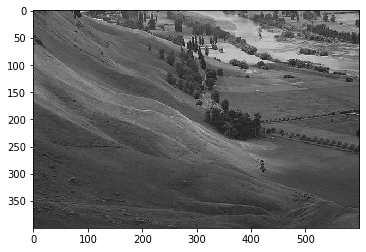

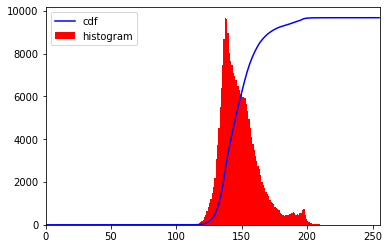

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

bgr_img = cv2.imread('wiki.jpg')
img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)
hist = cv2.calcHist([img],[0],None,[256],[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.imshow(img,cmap="gray")
plt.show()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

**Equalizes the histogram of a grayscale image**

The function equalizes the histogram of the input image using the following algorithm:

Calculate the histogram H for src .
Normalize the histogram so that the sum of histogram bins is 255.
Compute the integral of the histogram:
H′i=∑0≤j<iH(j)

Transform the image using H′ as a look-up table: 𝚍𝚜𝚝(x,y)=H′(𝚜𝚛𝚌(x,y))
The algorithm normalizes the brightness and increases the contrast of the image.

Parameters
src	Source 8-bit single channel image.
dst	Destination image of the same size and type as src .


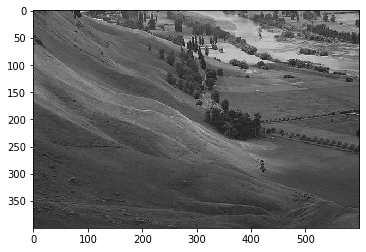

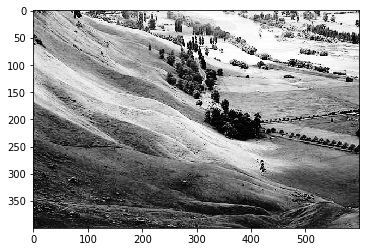

In [10]:
bgr_img = cv2.imread('wiki.jpg')
img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)

equ_img = cv2.equalizeHist(img)

plt.imshow(img,cmap="gray")
plt.show()
plt.imshow(equ_img,cmap="gray")
plt.show()

**CLAHE (Contrast Limited Adaptive Histogram Equalization)**

In this, image is divided into small blocks called “tiles” (tileSize is 8x8 by default in OpenCV). Then each of these blocks are histogram equalized as usual. So in a small area, histogram would confine to a small region (unless there is noise). If noise is there, it will be amplified. To avoid this, contrast limiting is applied. If any histogram bin is above the specified contrast limit (by default 40 in OpenCV), those pixels are clipped and distributed uniformly to other bins before applying histogram equalization. After equalization, to remove artifacts in tile borders, bilinear interpolation is applied.

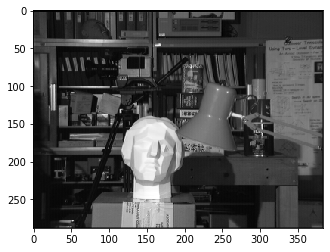

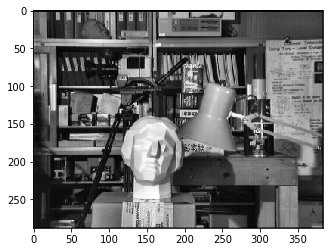

In [7]:
import numpy as np
import cv2

img = cv2.imread('tsukuba_l.png',0)
plt.imshow(img,cmap="gray")
plt.show()

# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)

plt.imshow(cl1,cmap="gray")
plt.show()